In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from src.env_hiv import HIVPatient
from src.agents.DQN_agent import dqn_agent
from gymnasium.wrappers import TimeLimit

State dimension is: 6 and the number of possible actions is: 4


Episode Progress: 100%|██████████| 200/200 [18:57<00:00,  5.69s/it, Episode=200, Epsilon=0.01, Batch Size=4e+4, Episode Return=3.23e+10] 


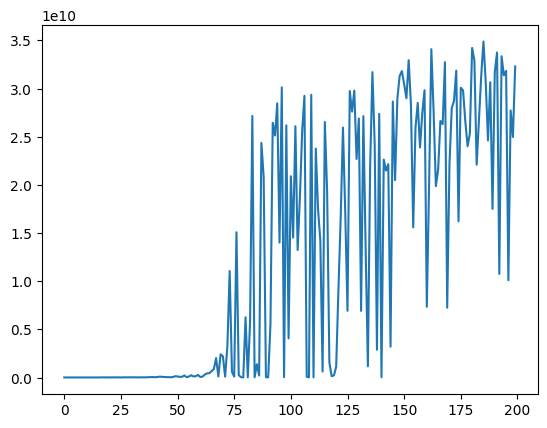

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

environment = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)

state_dim = environment.observation_space.shape[0]
n_action = environment.action_space.n 
print(f"State dimension is: {state_dim} and the number of possible actions is: {n_action}")

DQN = torch.nn.Sequential(nn.Linear(state_dim, 256),
                          nn.ReLU(),
                          nn.Linear(256, 128),
                          nn.ReLU(),
                          nn.Linear(128, 256),
                          nn.ReLU(),
                          nn.Linear(256, n_action)).to(device)

# DQN config
config = {'nb_actions': environment.action_space.n,
          'learning_rate': 0.001,
          'gamma': 0.95,
          'buffer_size': 1000000,
          'epsilon_min': 0.01,
          'epsilon_max': 1.,
          'epsilon_decay_period': 15000,
          'epsilon_delay_decay': 200,
          'batch_size': 1000,
          'use_Huber_loss': True,
          'gradient_steps': 6,
          'update_target_strategy': 'replace',
          'update_target_freq': 800,
          'update_target_tau': 0.001
          }


# Train agent
agent = dqn_agent(config, DQN)
scores = agent.train(environment, 200)
plt.plot(scores)